# Analysis of Black Friday shopping dataset




Import necessary modules: NumPy, Pandas, Matplotlib, Seaborn, ...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)

## Read the dataset

Read the csv dataset using `pd.read_csv()`.

The dataset comprises of sales transactions captured at a retail store: Black Friday shopping dataset. We will extract useful information that will answer questions like: what gender shops more on Black Friday? Do the occupations of the people have any impact on sales? Then, we will create a simple machine learning algorithm that predicts the amount of money that a person would spend on Black Friday depending on features such as gender, age, occupations, etc.

In [ ]:
import requests
from io import StringIO

In [ ]:
orig_url = 'https://drive.google.com/file/d/1lGdc780LH6jzl9eFhO2p4wITdjIOGRn4/view?usp=sharing'
file_id = orig_url.split('/')[-2]
down_url = 'https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(down_url).text
csv_url = StringIO(url)

In [ ]:
data = pd.read_csv(csv_url)

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data Analysis and Visualization



Looking at the data:

* user_id: user id
* product_id: product id
* gender: sex of user
* age: age in bins
* occupation: occupation (masked)
* city_category: category of the city (A,B,C)
* stay_in_current_city_years: number of years stay in current city
* marital_status: marital status
* product_category_1: product category (masked)
* category_2,3: product may belongs to other category also
* purchase: purchase amount (target variable)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
print(data.shape)

(550068, 12)


We want to answer the questions:

* What gender shops more on Black Friday? What gender spends more on Balck Friday?
* Do the occupations of the people have any impact on sales?

In [ ]:
data.groupby(data.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [ ]:
data.groupby(data.Gender).Purchase.min()

Gender
F    12
M    12
Name: Purchase, dtype: int64

In [ ]:
data[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


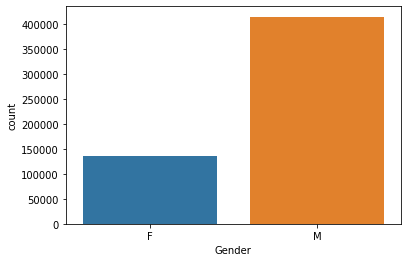

In [ ]:
sns.countplot(data['Gender'])
plt.show()

Visualizing the age of customers, taking into consideration the 'Gender' category. We can use [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function for this purpose.

In [ ]:
data[['Age', 'Purchase']].groupby('Age').mean()

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


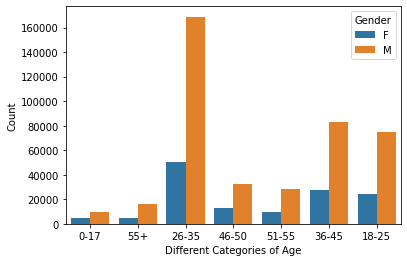

In [ ]:
sns.countplot(data['Age'], hue=data['Gender'])
plt.xlabel('Different Categories of Age')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


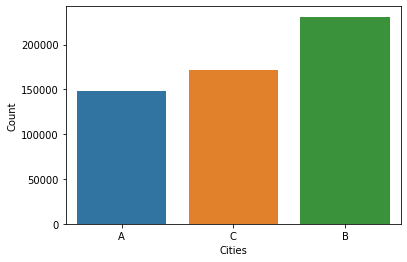

In [ ]:
# visulaizing the cities the customers are from

sns.countplot(data['City_Category'])
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

In [ ]:
data[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


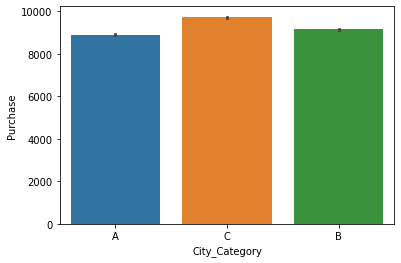

In [ ]:
sns.barplot(x='City_Category', y='Purchase', data=data)

In [ ]:
data['Occupation'].nunique()

21

In [ ]:
occupations_id = list(range(0,21))
spent_money=[]
for oid in occupations_id:
  spent_money.append(data[data['Occupation'] == oid]['Purchase'].sum())

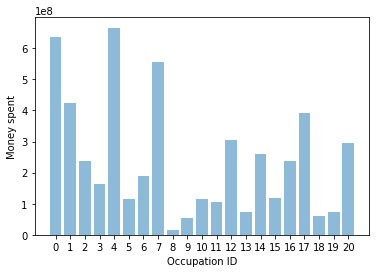

In [ ]:
objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent_money, align='center', alpha=0.5)    #align : 막대 위치
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.xlabel('Occupation ID')

plt.show()

## Data Preprocessing

* Missing data in columns 'Product_Category_2' and 'Product_Category_3'
  * Fill missing values with the mean of the existing values

* Drop less important data

* Categorical variables: 'Gender', 'Age', 'City_Category' and 'Stay_In_Current_City_Years'
  * Use [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from sklearn that encodes target labels with value between 0 and 'n_classes-1'
    * Encode using `fit` and `transform` operations

* Scaling variables:
  * Use [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) from sklearn that standardizes features by removing the mean and scaling to unit variance

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# target 제외
X = data.drop(['Purchase'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [ ]:
# target만 저장
y = data['Purchase']
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [ ]:
X.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
dtype: int64

In [ ]:
# imputing missing values

X['Product_Category_2'].fillna(value=X['Product_Category_2'].mean(), inplace=True)
X['Product_Category_3'].fillna(value=X['Product_Category_3'].mean(), inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [ ]:
user_id = X['User_ID']
product_id = X['Product_ID']

X.drop(['User_ID', 'Product_ID', 'Product_Category_3'], axis=1, inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 33.6+ MB


In [ ]:
le = LabelEncoder()
encoding_list = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

for item in encoding_list:
  X[item] = le.fit_transform(X[item])   #fit + transform


In [ ]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,10,0,2,0,3,9.842329
1,0,0,10,0,2,0,1,6.000000
2,0,0,10,0,2,0,12,9.842329
3,0,0,10,0,2,0,12,14.000000
4,1,6,16,2,4,0,8,9.842329


In [ ]:
print(X.shape)

(550068, 8)


In [ ]:
sc = StandardScaler()

X = sc.fit_transform(X)

In [ ]:
X[:5]

array([[-1.74651251e+00, -1.84424754e+00,  2.94863556e-01,
        -1.37151602e+00,  1.09801420e-01, -8.33017987e-01,
        -6.10808714e-01,  4.22153275e-16],
       [-1.74651251e+00, -1.84424754e+00,  2.94863556e-01,
        -1.37151602e+00,  1.09801420e-01, -8.33017987e-01,
        -1.11891197e+00, -9.13134028e-01],
       [-1.74651251e+00, -1.84424754e+00,  2.94863556e-01,
        -1.37151602e+00,  1.09801420e-01, -8.33017987e-01,
         1.67565594e+00,  4.22153275e-16],
       [-1.74651251e+00, -1.84424754e+00,  2.94863556e-01,
        -1.37151602e+00,  1.09801420e-01, -8.33017987e-01,
         1.67565594e+00,  9.88075303e-01],
       [ 5.72569618e-01,  2.58827703e+00,  1.21473444e+00,
         1.25933601e+00,  1.66086068e+00, -8.33017987e-01,
         6.59449430e-01,  4.22153275e-16]])

In [ ]:
print(X.shape)
print(y.shape)

(550068, 8)
(550068,)


## Predict the amount of Purchase: Regression

We will first use linear regression model in order to predict the amount spent by the customer on Black Friday. We will use [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression).

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

### Train, Test datasets

First, we need to divide all of data into two sets: training and testing set. The training set will be used to fit our model. Training data is always used for learning, finding model parameters that minimizes an error on the output. The test data will be used to evaluate performances.

We can use [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split) to split the entire dataset into random train and test subsets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Build a model, Fit the model, and Evaluate the model

In [ ]:
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.coef_

array([  222.60785222,   161.9690327 ,    41.24174555,   262.5130977 ,
          10.11081206,   -27.69792313, -1613.14776836,  -297.15689458])

In [ ]:
lin_reg.intercept_

9266.286099823912

In [ ]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Linear regression: RMSE train: %f' %(np.sqrt(mse_train)))
print('Linear regression: RMSE test: %f' %(np.sqrt(mse_test)))

Linear regression: RMSE train: 4693.971575
Linear regression: RMSE test: 4683.932869


### Try other models

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=10)
tree_reg.fit(X_train, y_train)

y_pred_train = tree_reg.predict(X_train)
y_pred_test = tree_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Tree RMSE train: %f' %(np.sqrt(mse_train)))
print('Tree RMSE test: %f' %(np.sqrt(mse_test)))

Tree RMSE train: 2952.369834
Tree RMSE test: 3000.184305


In [ ]:
forest_reg = RandomForestRegressor(max_depth=10, n_estimators=10)
forest_reg.fit(X_train, y_train)

y_pred_train = forest_reg.predict(X_train)
y_pred_test = forest_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Forest RMSE train: %f' %(np.sqrt(mse_train)))
print('Forest RMSE test: %f' %(np.sqrt(mse_test)))

Forest RMSE train: 2941.267691
Forest RMSE test: 2989.526689


### Visualize learning results

We can check both the training score and validation score during the training by using [`learning_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning_curve#sklearn.model_selection.learning_curve): it displays cross-validated training and test scores for different training set sizes.

We can use [`sklearn.model_selection.validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve) to compute and see training and test scores for varying parameter values.

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve

In [ ]:
forest_reg = RandomForestRegressor(max_depth=10, n_estimators=10)
train_sizes, train_scores, test_scores = learning_curve(estimator=forest_reg, X=X_train, y=y_train, cv=5) # cv : cross validation

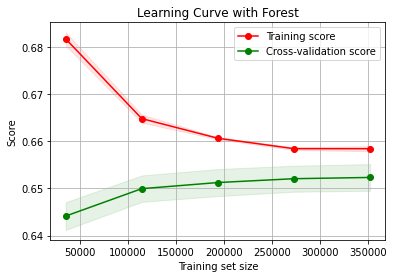

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Learning Curve with Forest")
plt.xlabel(r"Training set size")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color='g')
plt.show()

In [ ]:
forest_reg = RandomForestRegressor(max_depth=10, n_estimators=10)
param_range = np.arange(1, 16, 3)

train_scores, test_scores = validation_curve(estimator=forest_reg, X=X_train, y=y_train, cv=5, param_name='max_depth', param_range=param_range)

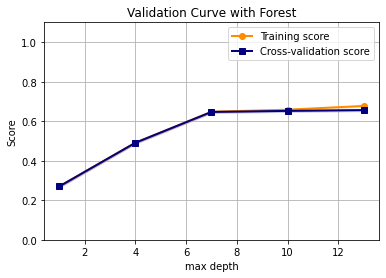

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Forest")
plt.xlabel(r"max depth")
plt.ylabel("Score")
plt.grid()
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", marker='o', lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", marker='s', lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()